In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("../../../backend/data/metsim_results/6H_VIC_20010401-20210610.nc")
ds

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, time: 29504)
Coordinates:
  * time            (time) datetime64[ns] 2001-04-01 ... 2021-06-10T18:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
Data variables:
    temp            (time, lat, lon) float32 ...
    prec            (time, lat, lon) float32 ...
    shortwave       (time, lat, lon) float32 ...
    longwave        (time, lat, lon) float32 ...
    air_pressure    (time, lat, lon) float32 ...
    vapor_pressure  (time, lat, lon) float32 ...
    wind            (time, lat, lon) float32 ...
Attributes: (12/32)
    conventions:              1.6
    title:                    Output from MetSim
    institution:              University of Washington
    source:                   metsim.py
    history:                  Created: Wed Jul 14 19:41:41 2021 by skahmad
    comment:                  no comment at this time
    ...                       ...
    tday_coef:                0.45
    lapse_rate:               0.0065
    chunks:                   {lat: 30, lon: 20}
    scheduler:                distributed
    forcing:                  /houston2/pritam/rat_mekong_v3/backend/data/met...
    in_format:                netcdf

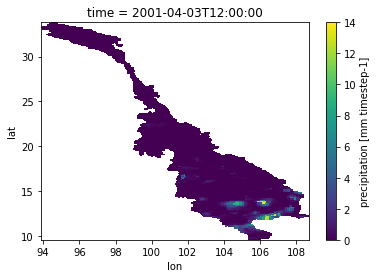

In [4]:
ds.prec.isel(time=10).plot()

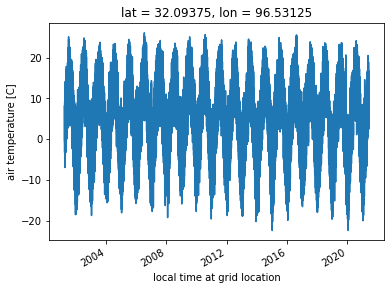

In [5]:
ds.temp.isel(lat=27, lon=42).plot()

(array([  75.,  655., 1782., 3093., 4849., 6540., 6074., 3951., 2398.,
          87.]),
 array([-23.457321 , -18.36332  , -13.269316 ,  -8.175313 ,  -3.0813103,
          2.0126925,   7.106695 ,  12.200698 ,  17.2947   ,  22.388702 ,
         27.482706 ], dtype=float32),
 <BarContainer object of 10 artists>)

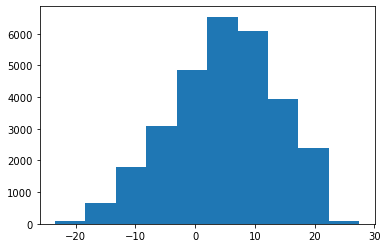

In [6]:
plt.hist(ds.temp.isel(lat=27, lon=40).values)

In [7]:
years, datasets = zip(*ds.groupby('time.year'))
paths = [f'../../../backend/data/forcings/forcing_{y}.nc' for y in years]

xr.save_mfdataset(datasets, paths)